In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/vdwvc/data.zip" -d "/content/drive/My Drive/vdwvc/"
!unzip "/content/drive/My Drive/vdwvc/drive-download-20240724T111613Z-001.zip" -d "/content/drive/My Drive/vdwvc/"



Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (92).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (93).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (94).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (95).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (96).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (97).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (98).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/night (99).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/rainy day (1).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/rainy day (10).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/rainy day (100).jpg  
  inflating: /content/drive/My Drive/vdwvc/data/images/train/rainy day (101).jp

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 4.7 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (96 CPUs, 334.6 GB RAM, 17.6/225.3 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
%cd /content/drive/MyDrive/vdwvc/

!yolo task=detect mode=train model=/content/drive/MyDrive/vdwvc/runs/detect/train3/weights/last.pt data=/content/drive/MyDrive/vdwvc/data.yaml epochs=20 imgsz=640 resume = True

/content/drive/MyDrive/vdwvc
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/vdwvc/runs/detect/train3/weights/last.pt, data=/content/drive/MyDrive/vdwvc/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/vdwvc/runs/detect/train3/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

In [17]:
path_best_weights = "/content/drive/MyDrive/vdwvc/runs/detect/train3/weights/best.pt"
model = YOLO(path_best_weights)

metrics = model.val()
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/vdwvc/data/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]


                   all        200       1199      0.507      0.387      0.464      0.232
                   car        159        743      0.677      0.779      0.797      0.368
                  bike         99        125      0.584      0.673      0.708      0.403
                  auto         47         60      0.521        0.3      0.329      0.151
                 cycle         29         46      0.213      0.087     0.0801     0.0444
                   bus         48         52      0.804      0.633      0.637      0.248
             minitruck         54         58      0.534      0.178       0.18     0.0841
                 truck         32         47      0.861       0.34      0.546      0.305
                   van         25         28     0.0698     0.0714     0.0742     0.0332
                  taxi         10         10      0.802      0.811      0.951      0.503
                  toto         28         30          0          0      0.342      0.176
Speed: 0.9ms preproce

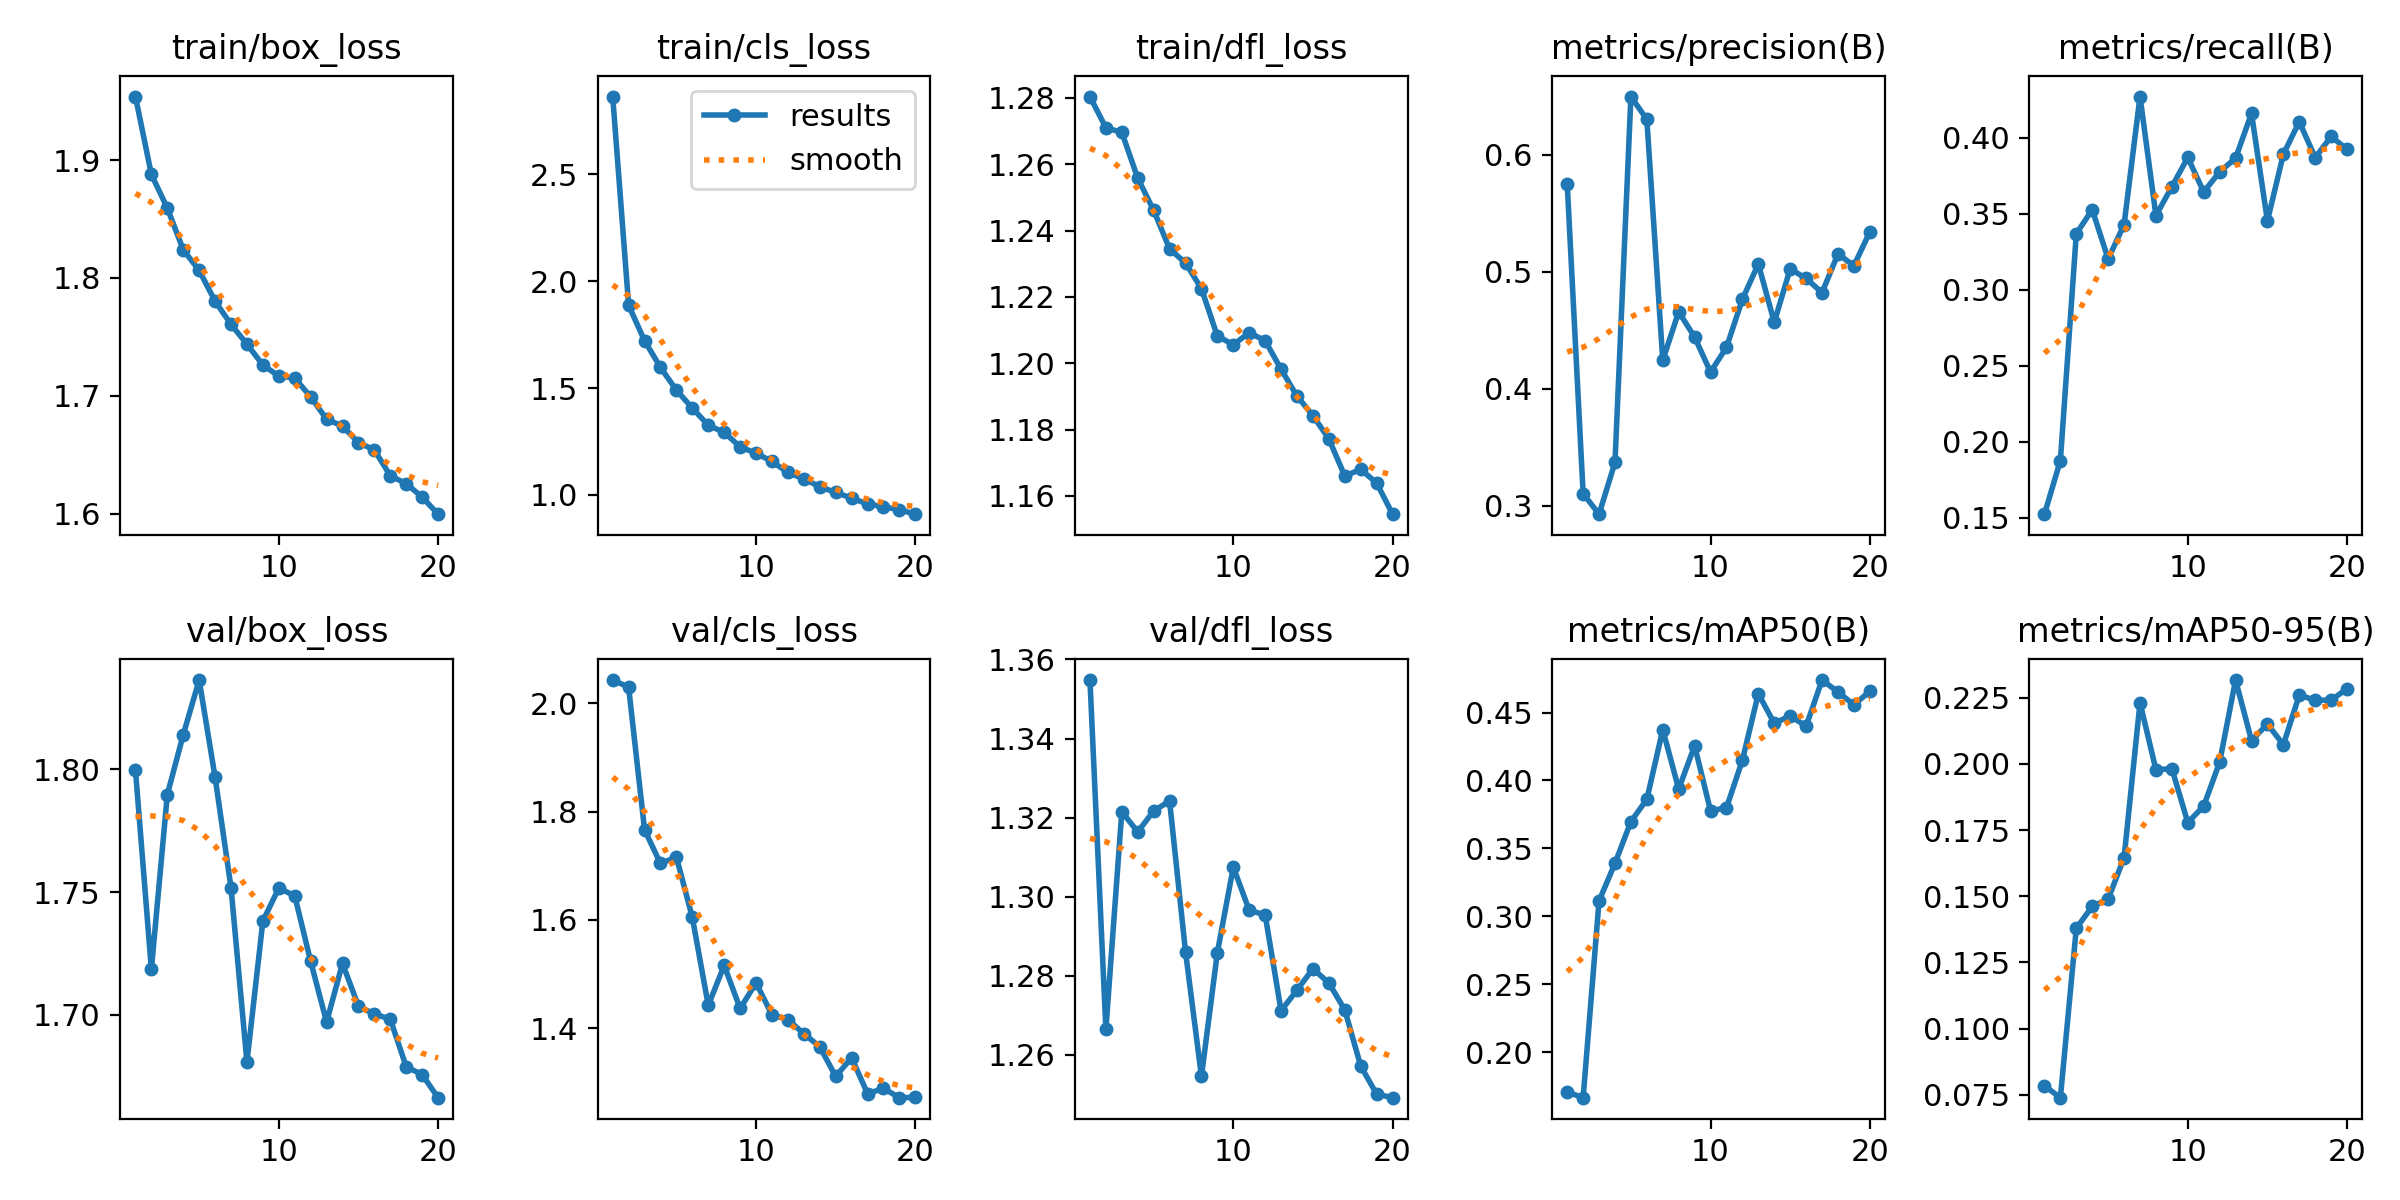

In [19]:
Image(filename='/content/drive/MyDrive/vdwvc/runs/detect/train3/results.png', width=600)


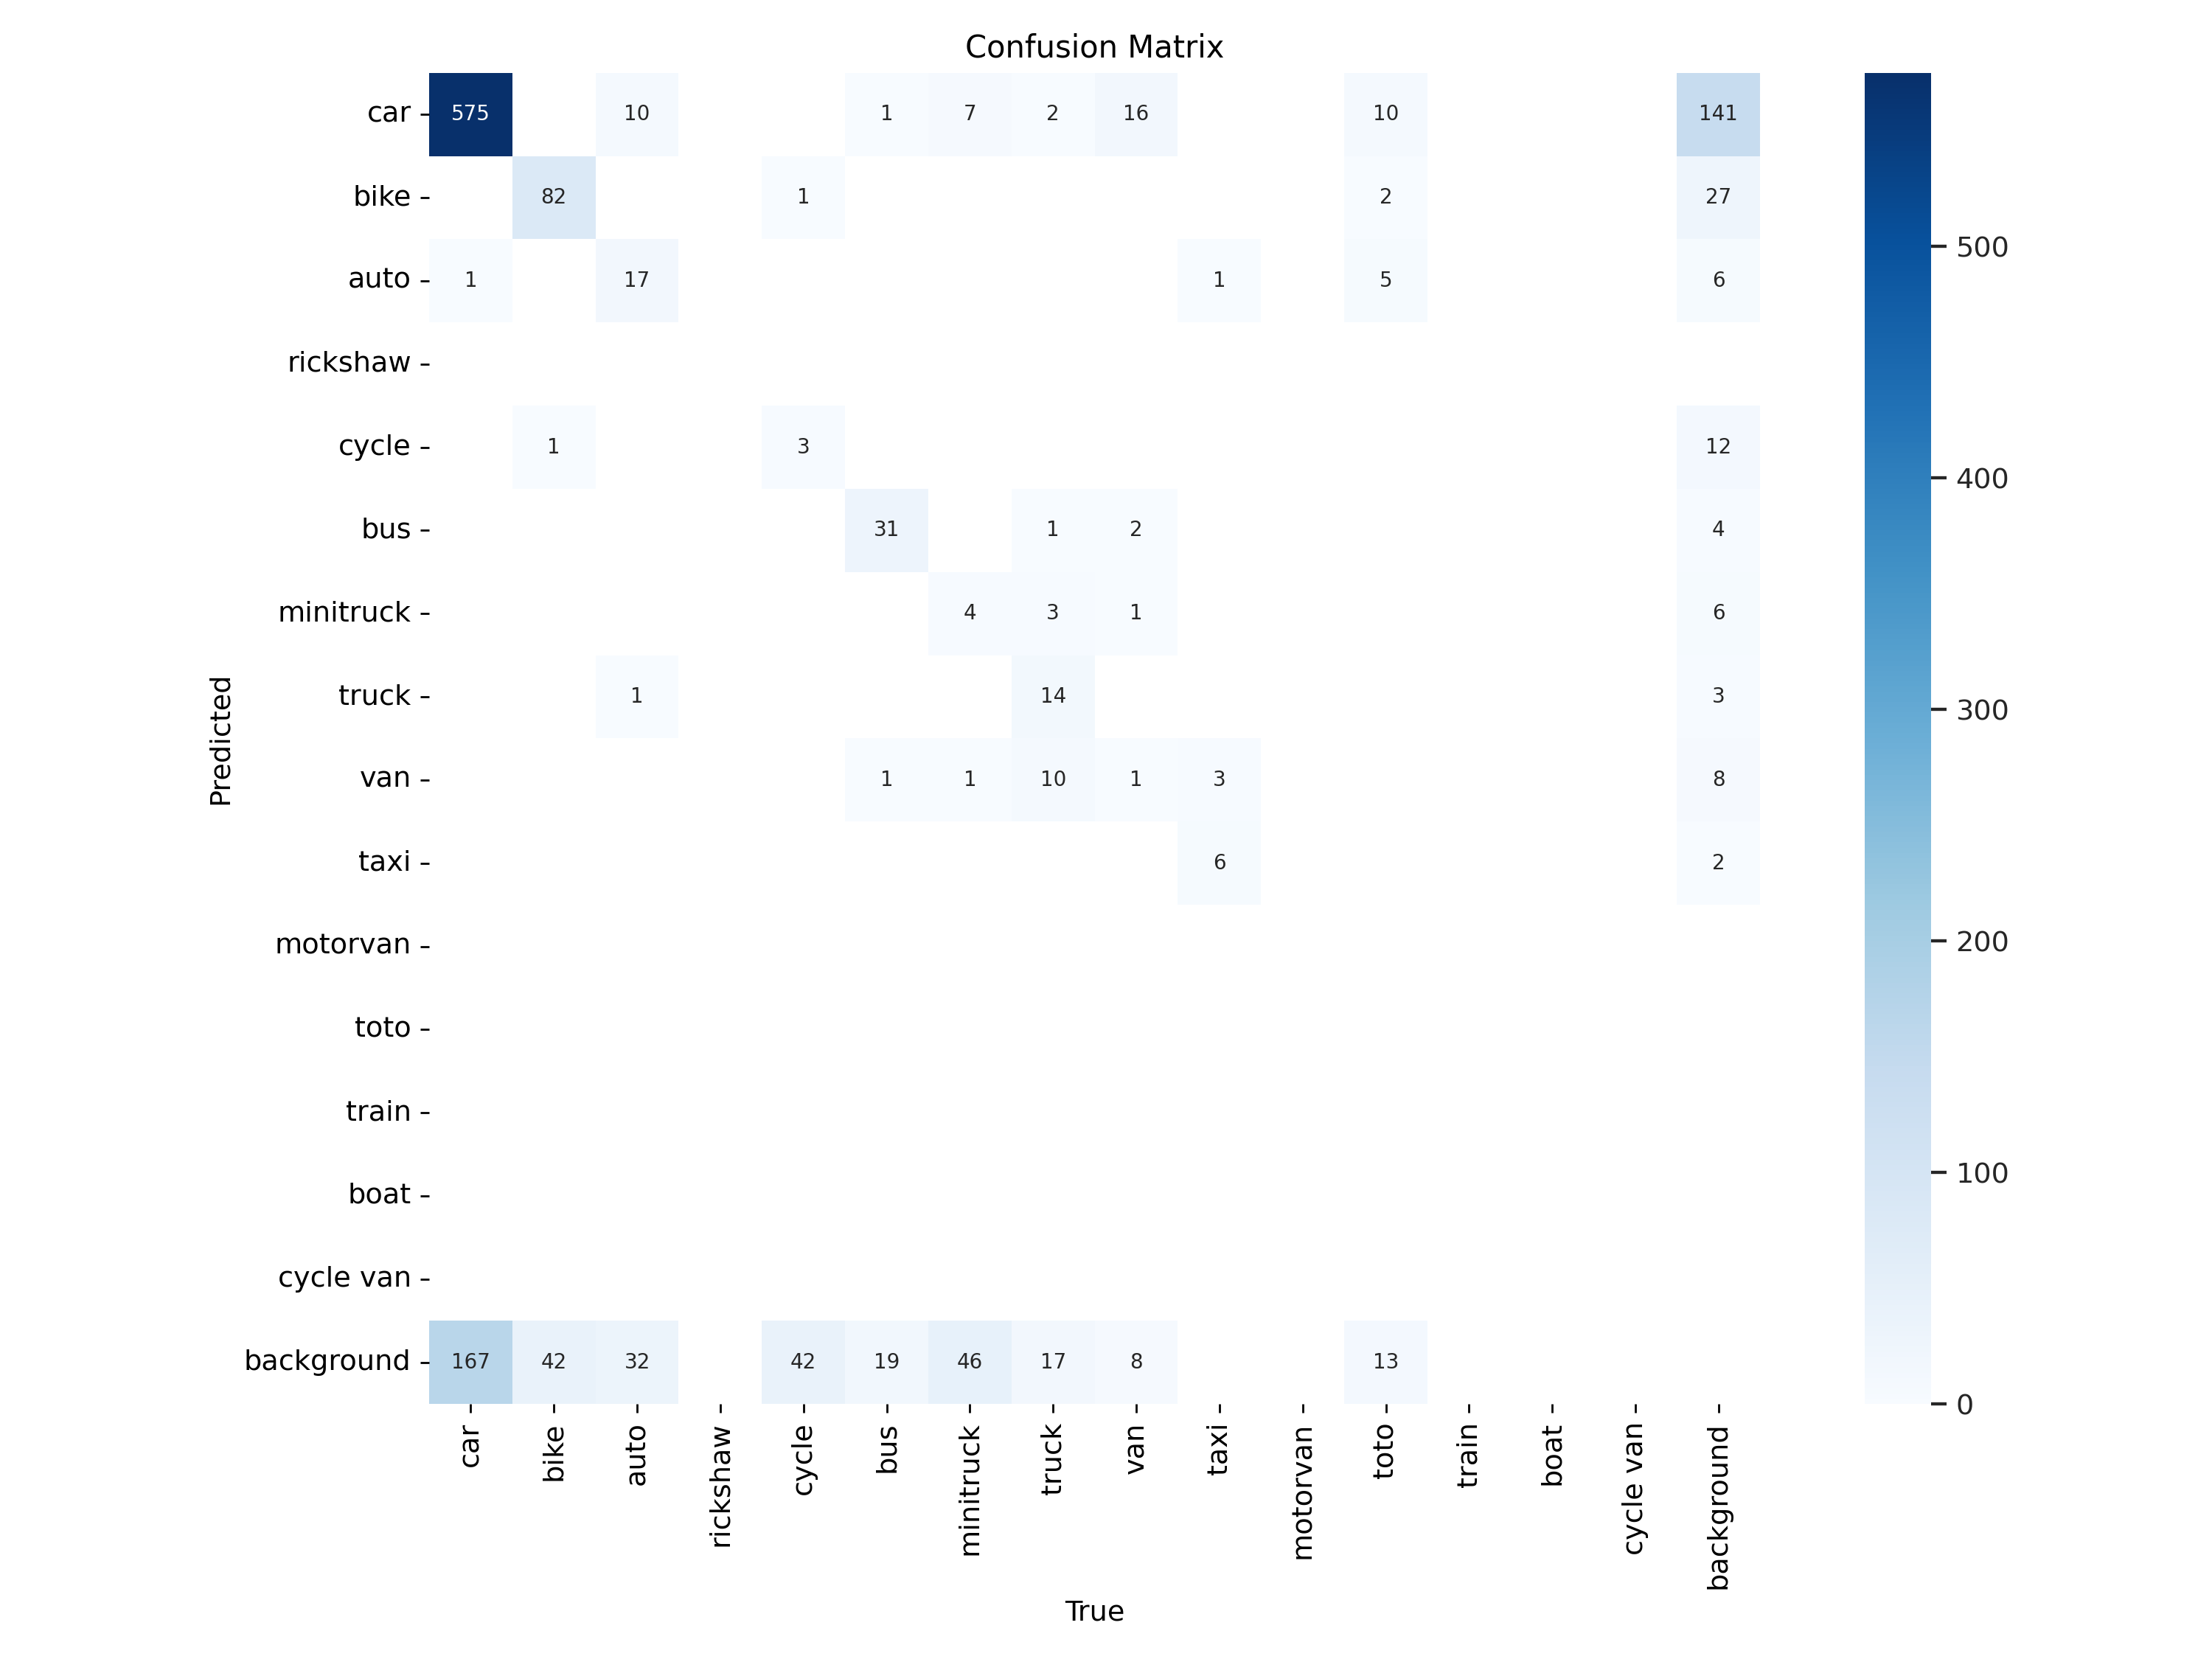

In [20]:
Image(filename='/content/drive/MyDrive/vdwvc/runs/detect/train3/confusion_matrix.png', width=600)